In [4]:
model_paths = {
    'bps_model': 'regression_Pipeline_BPS.pkl',
    'mps_model': 'regression_Pipeline_MPS.pkl',
    'fps_model': 'regression_Pipeline_FPS.pkl'
}
BPS_features = ['#Accept', '#Donor', '#O/#C', '#C', 'SLogP', '#Ether', '#Nitrile', 'apol', '#R=R', '#Ar-N', '#Ring', '#ArR', 'Vabc', '#Ester', '#AlHR', '#C=O', '#ArHR', '#Imine', '#Bran', 'Radius']
MPS_features = ['#Donor', '#Accept', 'SLogP', '#Ar-N', 'apol', '#R=R', '#O/#C', '#Ether', '#ArHR', 'Vabc', '#Bran', '#ArR', '#C', '#Imine', '#AlHR', '#Ring', '#SCR', '#SHR', '#Ketone', '#AlCR']
FPS_features = ['#Accept', 'SLogP', '#Donor', '#C', '#O/#C', '#Ether', 'apol', '#R=R', '#Nitrile', '#Ar-N', '#ArR', '#AlHR', '#Imine', '#ArHR', 'Vabc', '#Ring', '#AlCR', '#Ester', '#C=O', '#SCR']
input_file1 = "QM9_129440_MLtraining"
input_file2 = "QM9_49762_MLtraining"

In [5]:
import pandas as pd
import numpy as np
import pickle
import os
df1 = pd.read_csv(f'{input_file1}.csv')
df2 = pd.read_csv(f'{input_file2}.csv').replace([np.inf, -np.inf], np.nan).dropna()


In [6]:

# Check if models exist and load them
models = {}
for name, path in model_paths.items():
    if os.path.exists(path):
        print(f"Loading {name} from {path}")
        with open(path, 'rb') as f:
            models[name] = pickle.load(f)
    else:
        print(f"Warning: {path} does not exist")
X_bps = df2[BPS_features] 
X_mps = df2[MPS_features]  
X_fps = df2[FPS_features]  
for name, path in model_paths.items():
    if os.path.exists(path):
        print(f"Loading {name} from {path}")
        with open(path, 'rb') as f:
            models[name] = pickle.load(f)
    else:
        print(f"Warning: {path} does not exist")

# Make predictions if models were loaded successfully
if 'bps_model' in models:
    # Kiểm tra features tồn tại trong dataframe
    missing_features = [feat for feat in BPS_features if feat not in df2.columns]
    if missing_features:
        print(f"Warning: Missing features for BPS prediction: {missing_features}")
    else:
        X_bps = df2[BPS_features]
        df2['bps_predicted'] = models['bps_model'].predict(X_bps)
        print("BPS predictions added to dataframe")

if 'mps_model' in models:
    missing_features = [feat for feat in MPS_features if feat not in df2.columns]
    if missing_features:
        print(f"Warning: Missing features for MPS prediction: {missing_features}")
    else:
        X_mps = df2[MPS_features]
        df2['mps_predicted'] = models['mps_model'].predict(X_mps)
        print("MPS predictions added to dataframe")

if 'fps_model' in models:
    missing_features = [feat for feat in FPS_features if feat not in df2.columns]
    if missing_features:
        print(f"Warning: Missing features for FPS prediction: {missing_features}")
    else:
        X_fps = df2[FPS_features]
        df2['fps_predicted'] = models['fps_model'].predict(X_fps)
        print("FPS predictions added to dataframe")

# Display the dataframe with predictions
result_cols = []
for target in ['bps', 'mps', 'fps']:
    if f'{target}_pred' in df2.columns and f'{target}_predicted' in df2.columns:
        result_cols.extend([f'{target}_pred', f'{target}_predicted'])

df2[result_cols]


Loading bps_model from regression_Pipeline_BPS.pkl
Loading mps_model from regression_Pipeline_MPS.pkl
Loading fps_model from regression_Pipeline_FPS.pkl


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.2.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading bps_model from regression_Pipeline_BPS.pkl


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.2.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading mps_model from regression_Pipeline_MPS.pkl
Loading fps_model from regression_Pipeline_FPS.pkl
BPS predictions added to dataframe
MPS predictions added to dataframe
FPS predictions added to dataframe


,bps_pred,bps_predicted,mps_pred,mps_predicted,fps_pred,fps_predicted
0,204.875000,204.875061,140.500000,140.500031,211.125000,211.125061
1,197.818182,197.818542,113.659091,113.659088,192.136364,192.136353
2,283.450000,333.022980,159.840909,133.072784,211.340909,238.408707
3,367.000000,366.954041,186.238636,186.242340,272.931818,272.939636
4,420.863636,420.855347,216.170455,216.050797,314.840909,314.849396
...,...,...,...,...,...,...
49757,521.227273,511.935028,302.659091,334.035461,365.136364,362.891327
49758,536.818182,525.267456,334.500000,392.683777,381.704545,387.590363
49759,516.045455,515.572021,319.477273,326.749817,375.363636,372.665558
49760,549.090909,520.972778,349.613636,368.673492,407.636364,398.791138


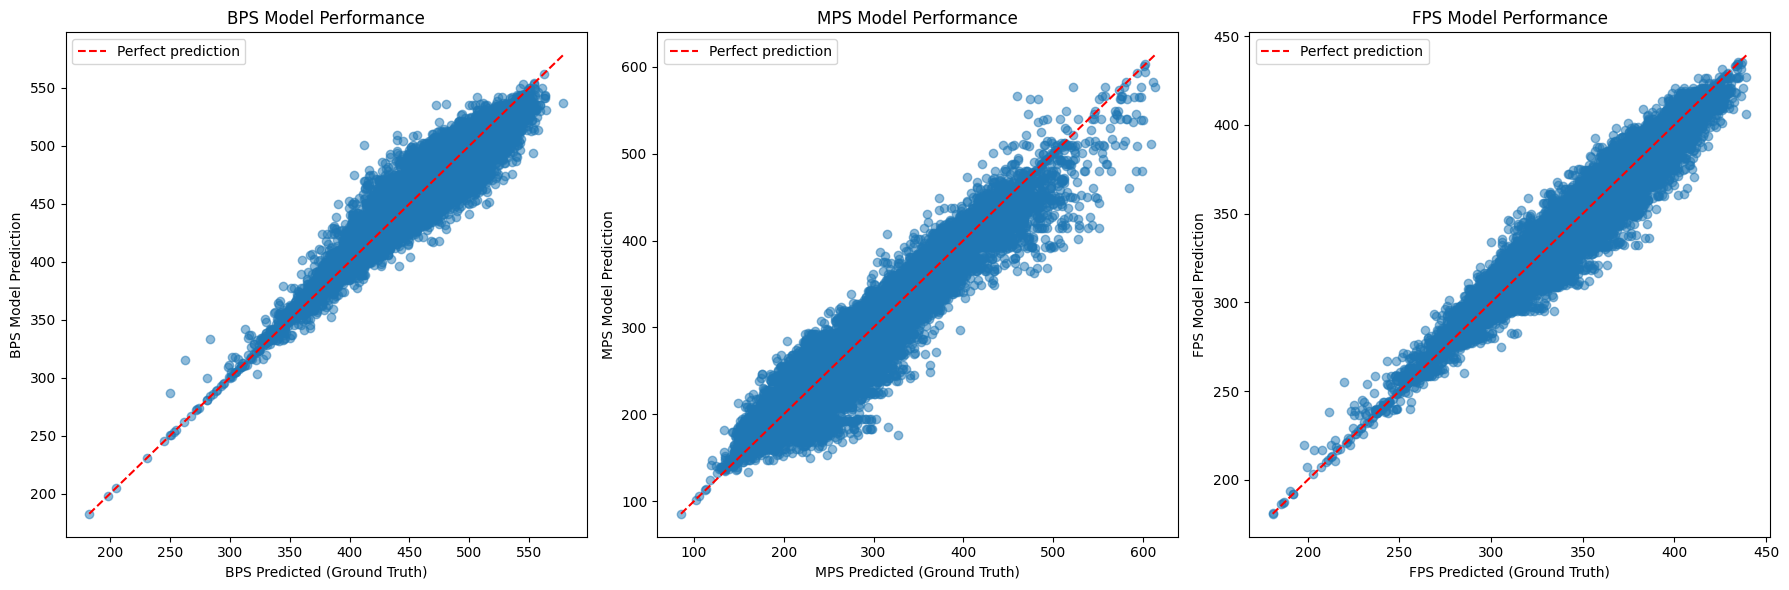

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: BPS prediction vs actual
axs[0].scatter(df2['bps_pred'], df2['bps_predicted'], alpha=0.5)
axs[0].plot([df2['bps_pred'].min(), df2['bps_pred'].max()], 
           [df2['bps_pred'].min(), df2['bps_pred'].max()], 
           'r--', label='Perfect prediction')
axs[0].set_xlabel('BPS Predicted (Ground Truth)')
axs[0].set_ylabel('BPS Model Prediction')
axs[0].set_title('BPS Model Performance')
axs[0].legend()

# Plot 2: MPS prediction vs actual
axs[1].scatter(df2['mps_pred'], df2['mps_predicted'], alpha=0.5)
axs[1].plot([df2['mps_pred'].min(), df2['mps_pred'].max()], 
           [df2['mps_pred'].min(), df2['mps_pred'].max()], 
           'r--', label='Perfect prediction')
axs[1].set_xlabel('MPS Predicted (Ground Truth)')
axs[1].set_ylabel('MPS Model Prediction')
axs[1].set_title('MPS Model Performance')
axs[1].legend()

# Plot 3: FPS prediction vs actual
axs[2].scatter(df2['fps_pred'], df2['fps_predicted'], alpha=0.5)
axs[2].plot([df2['fps_pred'].min(), df2['fps_pred'].max()], 
           [df2['fps_pred'].min(), df2['fps_pred'].max()], 
           'r--', label='Perfect prediction')
axs[2].set_xlabel('FPS Predicted (Ground Truth)')
axs[2].set_ylabel('FPS Model Prediction')
axs[2].set_title('FPS Model Performance')
axs[2].legend()

plt.tight_layout()
plt.show()